## Compute Drawdowns

In [81]:
import pandas as pd 
import numpy as np
me_m=pd.read_csv('data/Portfolios_Formed_on_ME_monthly_EW.csv',header=0,index_col=0,parse_dates=True,na_values=-99.99)

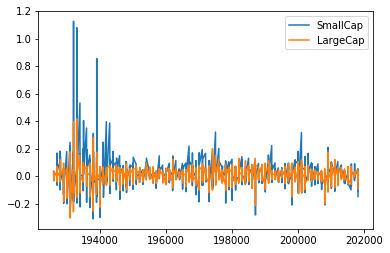

In [82]:
Columns=['Lo 20','Hi 20']
rets=me_m[Columns]
rets.columns=['SmallCap','LargeCap']
rets=rets/100
rets.plot.line()

In [83]:
rets.index=pd.to_datetime(rets.index,format='%Y%m')

In [85]:
#rets.index=rets.index.to_period('M')
rets["1998"]
#rets.head()

,SmallCap,LargeCap
1998-01,0.0252,-0.0069
1998-02,0.0519,0.0807
1998-03,0.0511,0.0486
1998-04,0.0371,0.0104
1998-05,-0.0425,-0.0260
1998-06,-0.0421,0.0213
1998-07,-0.0520,-0.0284
1998-08,-0.2094,-0.1507
1998-09,0.0190,0.0643
1998-10,0.0186,0.0918


In [61]:
rets.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1110 entries, 1926-07 to 2018-12
Freq: M
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SmallCap  1110 non-null   float64
 1   LargeCap  1110 non-null   float64
dtypes: float64(2)
memory usage: 26.0 KB


# Compute Drawdowns

1. Compute a weath index 
2. Compute Previous peaks
3. Compute draw down

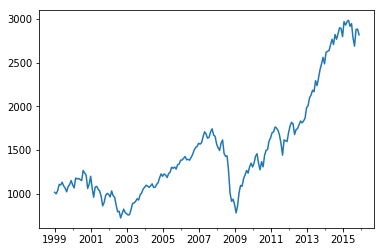

In [77]:
wealth_index=1000*(1+rets['LargeCap']).cumprod()
wealth_index.plot.line()

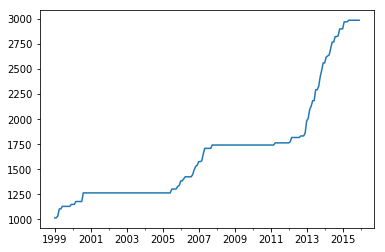

In [78]:
previous_peaks = wealth_index.cummax()
previous_peaks.plot()

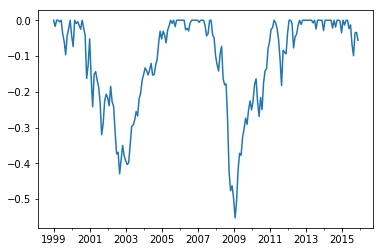

In [79]:
drawdown=(wealth_index-previous_peaks)/previous_peaks
drawdown.plot()

In [80]:
drawdown.min()

-0.5527349978713653

In [81]:
drawdown.idxmin()

Period('2009-02', 'M')

In [82]:
def drawdown(return_series:pd.Series):
    """
    Takes a time series of asset returns
    computes and returns a DataFrame 
    that contains: the wealth index,the previous peaks, and the percent drawdowns
    """
    
    wealth_index=1000*(1+return_series).cumprod()
    previous_peak=wealth_index.cummax()
    drawdowns=(wealth_index-previous_peak)/previous_peaks
    return pd.DataFrame({
        "Wealth":wealth_index,
        "Peaks":previous_peaks,
        "Drawdown":drawdowns
        
    })
    

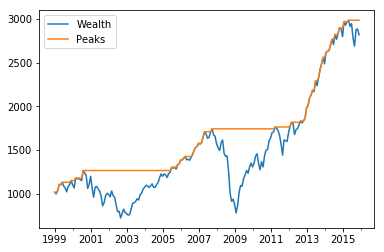

In [83]:
drawdown(rets['LargeCap'])[['Wealth','Peaks']].plot()

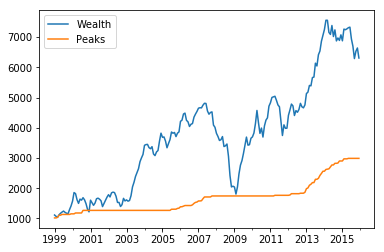

In [84]:
drawdown(rets['SmallCap'])[['Wealth','Peaks']].plot()

In [85]:
rets['SmallCap'].head()

1999-01    0.1114
1999-02   -0.0399
1999-03   -0.0308
1999-04    0.0824
1999-05    0.0435
Freq: M, Name: SmallCap, dtype: float64